In [2]:
# Lab 02 (2 hours) – Titanic Data: Ingestion, Missing Values, Outliers
# Learning Outcomes
# By the end of this lab, students will be able to:

# Apply a reproducible data ingestion and cleaning process.
# Handle missing and outlier values in Titanic dataset.
# Document preprocessing choices for reproducibility.

# Project
# Load Titanic CSV.
# EDA pass: .info(), .describe(), heatmap.
# Missing: impute & flag.
# Outliers: treat Fare as per chosen method.
# Save clean_v1.csv, decision_log.md, data_card.md.
# Resources

# Titanic Data Science Solutions – https://www.kaggle.com/code/startupsci/titanic-data-
# science-solutions

# Seaborn Tutorial – https://seaborn.pydata.org/tutorial.html
# Google Colab – https://colab.research.google.com

In [3]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# load and view titanic dataset
titanic_df = sns.load_dataset('titanic')
print("\n - - - - - availible features - - - - - \n") 
print(titanic_df.head().columns)
print("\n - - - - - dataframe head - - - - - \n") 
print(titanic_df.head())
print("\n - - - - - data info - - - - - \n") 
print(titanic_df.info())
print("\n - - - - - data describe - - - - - \n") 
print(titanic_df.describe())




 - - - - - availible features - - - - - 

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

 - - - - - dataframe head - - - - - 

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4 

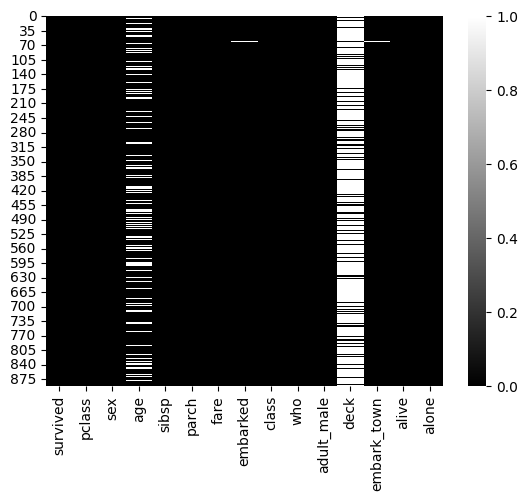

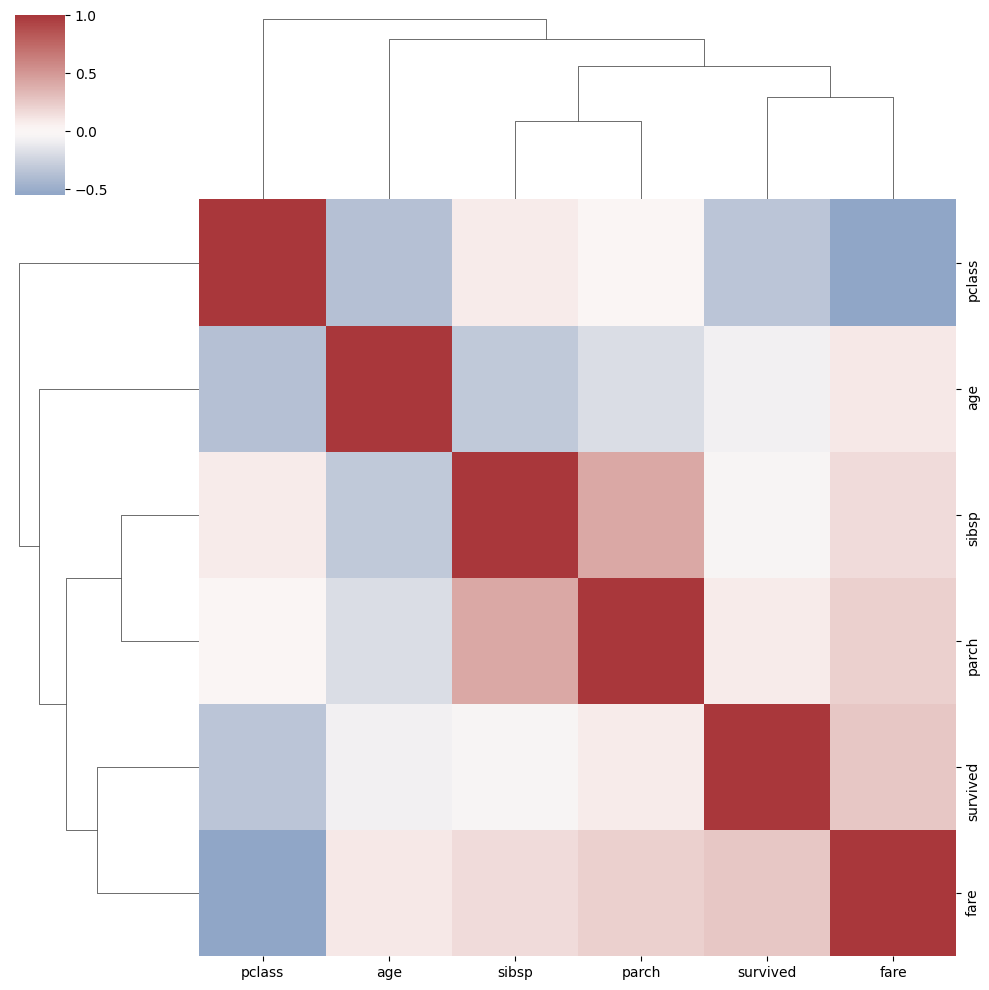

In [4]:
# heatmap - absent values white 
ax = sns.heatmap(titanic_df.isna(), cmap="gray", cbar=True)

num = titanic_df.select_dtypes(include=[np.number])
corr = num.corr()
sns.clustermap(corr, center=0, cmap="vlag", standard_scale=None)


In [5]:
clean = titanic_df.copy()

# pre clean
print("\n - - - - - PRE cleaning and imputation ds info - - - - - \n") 
clean.info()

# Drop unnecessarily messed cols and rows
clean = clean.drop(columns=["deck"])
clean = clean.dropna(subset=["embarked"])

# impute age with median and set flag 
age_median = clean["age"].median()
clean["age_was_missing"] = clean["age"].isna().astype(int)
clean["age"] = clean["age"].fillna(age_median)


# post clean
print("\n - - - - - POST cleaning and imputation ds info - - - - - \n") 
clean.info()



 - - - - - PRE cleaning and imputation ds info - - - - - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

 - - - - - POST cl

In [7]:
# outliers 
Q1 = clean["fare"].quantile(0.25)
Q3 = clean["fare"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


clean["fare_capped"] = clean["fare"].clip(lower=lower, upper=upper)
clean.info()
clean.fare.describe()

clean.to_csv("LabAssig2_cleanTitanicCSV.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   survived         889 non-null    int64   
 1   pclass           889 non-null    int64   
 2   sex              889 non-null    object  
 3   age              889 non-null    float64 
 4   sibsp            889 non-null    int64   
 5   parch            889 non-null    int64   
 6   fare             889 non-null    float64 
 7   embarked         889 non-null    object  
 8   class            889 non-null    category
 9   who              889 non-null    object  
 10  adult_male       889 non-null    bool    
 11  embark_town      889 non-null    object  
 12  alive            889 non-null    object  
 13  alone            889 non-null    bool    
 14  age_was_missing  889 non-null    int64   
 15  fare_capped      889 non-null    float64 
dtypes: bool(2), category(1), float64(3), int64(5), ob